# Exercise: Complete Modeling Workflow
File obsdata.csv contains four columns, each with 20 points: time, A, B, C. 
1. Evaluate each of the following models to find which provides the best fit.
1. Construct a 95% confidence interval for the model with the best fit.
1. The "observational data" were generated by a model that contains a chemical species D that is not present in the other models. How might we detect that there is a missing chemical species?

In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import model_fitting as mf

In [2]:
# Globals
num_points = 20
sim_time = 20

## Full model

In [3]:
# Model used in this example
model0 = """
     # True model
     A  -> B + D; k1*A
     B -> D; k2*B
     D -> C; k3*A*B
      
     A = 5;
     B = 0;
     C = 0;
     D = 0;
     k1 = 0.08
     k2 = 0.1
     k3 = 0.1
"""
unfitted_parameters = mf.makeParameters(constants=['k1', 'k2', 'k3'])
unfitted_parameters

name,value,initial value,min,max,vary
k1,1.00000000,1,0.00000000,10.0000000,True
k2,1.00000000,1,0.00000000,10.0000000,True
k3,1.00000000,1,0.00000000,10.0000000,True


In [4]:
noise_std = 0.3
full_obs_data = mf.makeObservations(model=model0, noise_std=noise_std, num_points=num_points, sim_time=sim_time)
obs_data = full_obs_data[:, [0, 1, 2,  4]]
obs_data

 [[       0,  4.83198, 0.325681,        0],
  [ 1.05263,  5.00963, 0.444181,        0],
  [ 2.10526,  4.14714, 0.716779,        0],
  [ 3.15789,  3.64448, 0.613704,   0.4463],
  [ 4.21053,  3.60553,  0.89887, 0.534928],
  [ 5.26316,   4.0217,  1.13879,  1.79658],
  [ 6.31579,  3.34346, 0.900149,  2.00489],
  [ 7.36842,  2.07405,  1.17943,  2.62015],
  [ 8.42105,  2.04613, 0.879538,  3.20828],
  [ 9.47368,  2.65963,  1.81024,  3.89383],
  [ 10.5263,  2.39856,   1.4413,  3.37208],
  [ 11.5789,  1.84042,  1.84262,  3.81657],
  [ 12.6316,  2.24962,  1.29648,  3.81395],
  [ 13.6842,  1.22416,  1.30231,  4.59969],
  [ 14.7368,  1.51571,  1.91911,  5.14351],
  [ 15.7895,  1.10966,  1.99353,  5.43183],
  [ 16.8421, 0.724454,  1.66229,  5.74925],
  [ 17.8947,  1.47164,  1.42634,  4.80918],
  [ 18.9474,   1.5603,  1.29853,  5.91836],
  [      20,  1.17071,  1.84423,  5.52149]]

In [5]:
full_obs_data

       time,      [A],      [B],       [D],      [C]
 [[       0,  4.83198, 0.325681,  0.230124,        0],
  [ 1.05263,  5.00963, 0.444181,  0.458152,        0],
  [ 2.10526,  4.14714, 0.716779,  0.480575,        0],
  [ 3.15789,  3.64448, 0.613704,  0.561469,   0.4463],
  [ 4.21053,  3.60553,  0.89887,   0.48581, 0.534928],
  [ 5.26316,   4.0217,  1.13879,  0.427574,  1.79658],
  [ 6.31579,  3.34346, 0.900149,   0.83554,  2.00489],
  [ 7.36842,  2.07405,  1.17943,  0.273331,  2.62015],
  [ 8.42105,  2.04613, 0.879538,   1.00901,  3.20828],
  [ 9.47368,  2.65963,  1.81024, 0.0425988,  3.89383],
  [ 10.5263,  2.39856,   1.4413,  0.265208,  3.37208],
  [ 11.5789,  1.84042,  1.84262,  0.617166,  3.81657],
  [ 12.6316,  2.24962,  1.29648,  0.352865,  3.81395],
  [ 13.6842,  1.22416,  1.30231,  0.640115,  4.59969],
  [ 14.7368,  1.51571,  1.91911,    0.4862,  5.14351],
  [ 15.7895,  1.10966,  1.99353,  0.427892,  5.43183],
  [ 16.8421, 0.724454,  1.66229,         0,  5.74925],
  [ 17.8947,

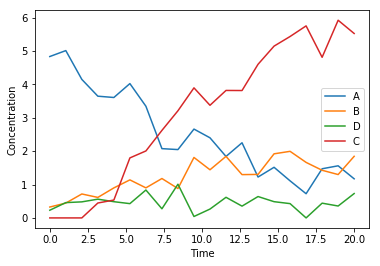

In [6]:
mf.plotTimeSeries(full_obs_data, columns=['A', 'B', 'D', 'C'])

## Candidate models

In [14]:
models = []
parameters_list = []
# Model used in this example
model = """
    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1', 'k2']))
models.append(model)

model = """
     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1', 'k2']))
models.append(model)


model = """
     # Model 3
     A + B -> C; k1*A
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1']))
models.append(model)

In [ ]:
for model in models:
    print(model)

## Model Analysis

In [11]:
# Evaluation using cross validation
for model, parameters in zip(models, parameters_list):
    print("\nModel: %s" % model)
    _, rsqs = mf.crossValidate(obs_data, model=model, parameters=parameters, 
                                         num_points=num_points, 
                                         method='differential_evolution',
                                         sim_time=sim_time,
                                         num_folds=3)
    print(rsqs)


Model: 
    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0

[0.750657324055612, 0.7192226899175549, 0.7194759190503892]

Model: 
     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0

[0.3808659715768915, 0.30590546140352515, 0.0991761451007489]

Model: 
     # Model 3
     A + B -> C; k1*A
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0

[-0.34350404425429204, -0.6068367731142201, -0.8400160858825787]


In [8]:
list_parameters, rsqs = mf.crossValidate(full_obs_data, model=model0, parameters=unfitted_parameters, 
                                         num_points=num_points, method='leastsq',
                                         sim_time=sim_time,
                                         num_folds=3)
rsqs

[0.8237991258361115, 0.7858592195265796, 0.7652177410035195]

In [7]:
mf.doBootstrap(full_obs_data, model=model0, parameters=unfitted_parameters, 
                                         num_points=num_points,
                                         sim_time=sim_time, count=5)

{'k1': array([0.06803726, 0.1125443 ]),
 'k2': array([0.13851753, 1.05679779]),
 'k3': array([0.11445024, 0.54486951])}

In [16]:
mf.doBootstrap(obs_data, model=models[0], parameters=parameters_list[0], 
                                         num_points=num_points,
                                         sim_time=sim_time, count=5)

{'k1': array([0.10850682, 0.1705973 ]), 'k2': array([0.31541886, 1.60653546])}